[*********************100%***********************]  1 of 1 completed
<class 'pandas.core.series.Series'>


<AxesSubplot:xlabel='Date'>

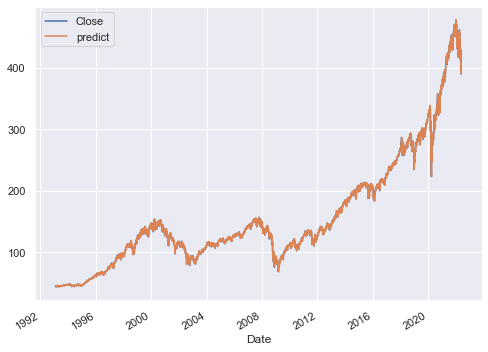

In [57]:
import numpy as np
import pandas as pd
import pandas_datareader as pdr
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize'] = 8, 6
import seaborn as sb
import yfinance as yf
sb.set()

SHEL = yf.download(tickers='SPY', period='30y')
SHEL_close = pd.DataFrame(SHEL.Close, columns = ['Close'])
SHEL_close['lag_1'] = SHEL_close.Close.shift(1)
SHEL_close['lag_2'] = SHEL_close.Close.shift(2)
SHEL_close.dropna(inplace = True)
#print(SHEL_close)

lr = np.linalg.lstsq(SHEL_close[['lag_1', 'lag_2']], SHEL_close['Close'], rcond = None)[0]

SHEL_close['predict'] = np.dot(SHEL_close[['lag_1', 'lag_2']], lr)
SHEL_close['predict_change'] = round(((SHEL_close['predict'] / SHEL_close['Close']) * 100) - 100, 2)
SHEL_close['actual_change'] = round((SHEL_close['Close'].shift(-1) / SHEL_close['Close'] * 100) - 100, 2)

print(type(SHEL_close['predict_change']))


# SHEL_close['correct'] = 0

# SHEL_close['correct'] = np.where((SHEL_close['predict_change'] > 0) & (SHEL_close['actual_change'] > 0), 1, 0)

# SHEL_close['correct'] = np.where((SHEL_close['predict_change'] < 0) & (SHEL_close['actual_change'] < 0), 1, 0)


SHEL_close['correct'] = 0

if np.where((SHEL_close['predict_change'] > 0) & (SHEL_close['actual_change'] > 0)) == True:
    SHEL_close['correct'] = 1


SHEL_close[['Close', 'predict']].plot()